# Part 1: Persiapan Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.sparse import hstack
warnings.filterwarnings('ignore')

In [2]:
data_games = pd.read_csv('tugas_genap.csv')

In [3]:
pd.set_option('display.max_columns', None)

# Part 2: Exploratory Data Analysis (EDA)

In [4]:
data_games.columns.tolist()

['game_name',
 'meta_score',
 'user_score',
 'platform',
 'description',
 'url',
 'developer',
 'genre',
 'type',
 'rating']

In [5]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    2000 non-null   object 
 1   meta_score   2000 non-null   float64
 2   user_score   2000 non-null   float64
 3   platform     2000 non-null   object 
 4   description  1980 non-null   object 
 5   url          2000 non-null   object 
 6   developer    1998 non-null   object 
 7   genre        1999 non-null   object 
 8   type         1571 non-null   object 
 9   rating       1696 non-null   object 
dtypes: float64(2), object(8)
memory usage: 156.4+ KB


In [6]:
data_games.isna().sum()

game_name        0
meta_score       0
user_score       0
platform         0
description     20
url              0
developer        2
genre            1
type           429
rating         304
dtype: int64

In [7]:
data_games.duplicated().sum()

np.int64(0)

In [8]:
data_games['description'] = data_games['description'].fillna("No description available")
data_games['developer'] = data_games['developer'].fillna(data_games['developer'].mode()[0])
data_games['genre'] = data_games['genre'].fillna(data_games['genre'].mode()[0])
data_games['type'] = data_games['type'].fillna(data_games['type'].mode()[0])
data_games['rating'] = data_games['rating'].fillna(data_games['rating'].mode()[0])

In [9]:
data_games.isna().sum()

game_name      0
meta_score     0
user_score     0
platform       0
description    0
url            0
developer      0
genre          0
type           0
rating         0
dtype: int64

In [10]:
data_games.head()

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+


In [11]:
data_games['meta_score'] = pd.to_numeric(data_games['meta_score'], errors='coerce')
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

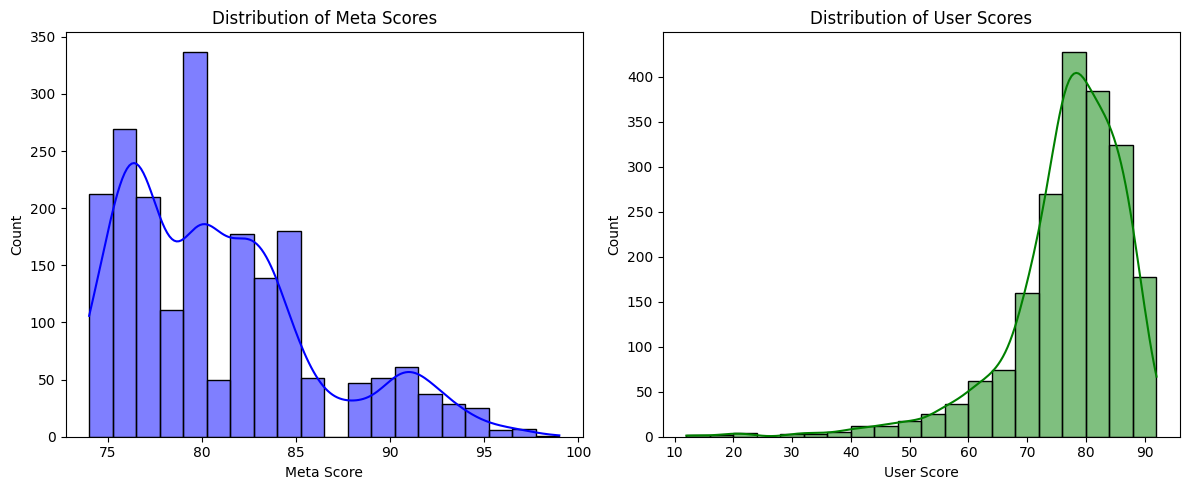

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_games['meta_score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Meta Scores')
plt.xlabel('Meta Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data_games['user_score'], bins=20, kde=True, color='green')
plt.title('Distribution of User Scores')
plt.xlabel('User Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.savefig('score_distribution.png')
plt.close()

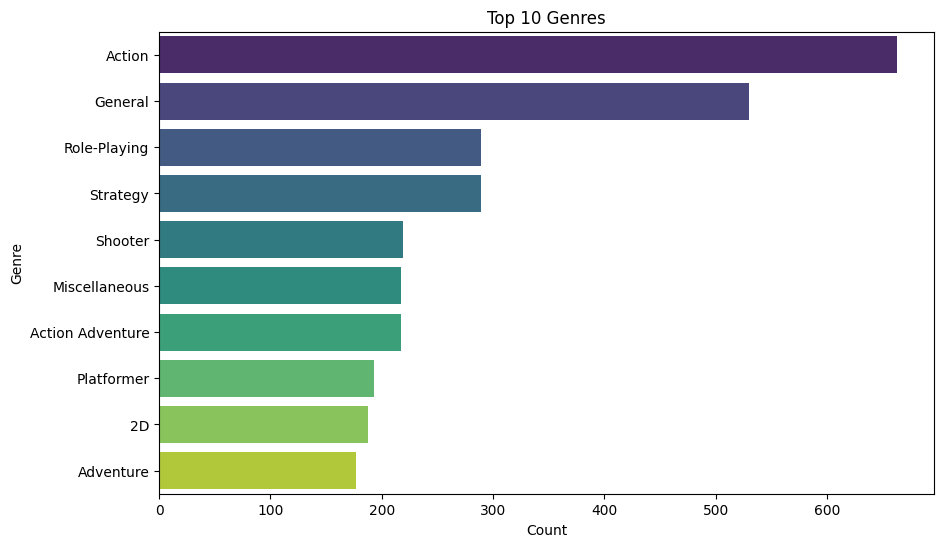

In [13]:
genres = [genre for sublist in data_games['genre'].str.strip("[]").str.replace("'", "").str.split(", ") for genre in sublist]
genre_counts = pd.Series(genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
plt.savefig('top_genres.png')
plt.close()

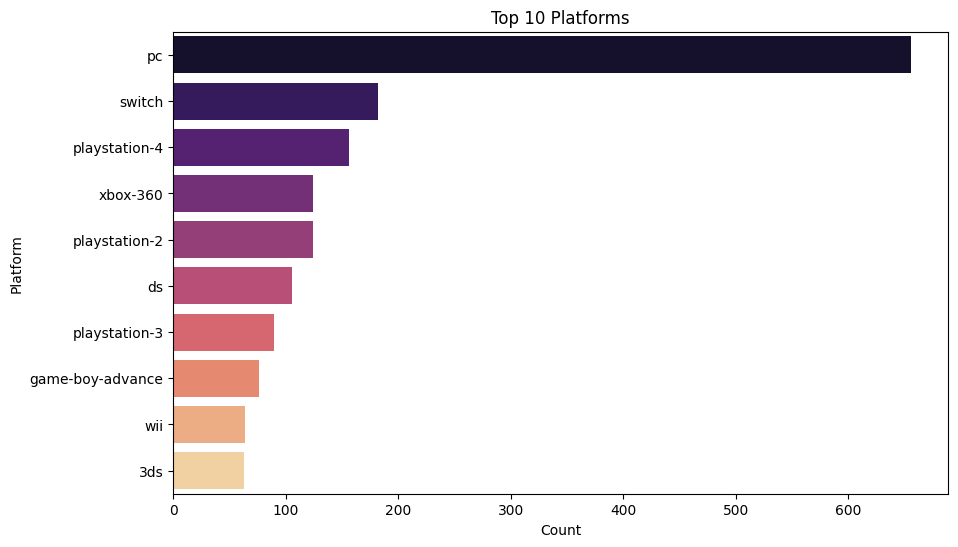

In [14]:
platforms = [platform for sublist in data_games['platform'].str.strip("[]").str.replace("'", "").str.split(", ") for platform in sublist]
platform_counts = pd.Series(platforms).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='magma')
plt.title('Top 10 Platforms')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()
plt.savefig('top_platforms.png')
plt.close()

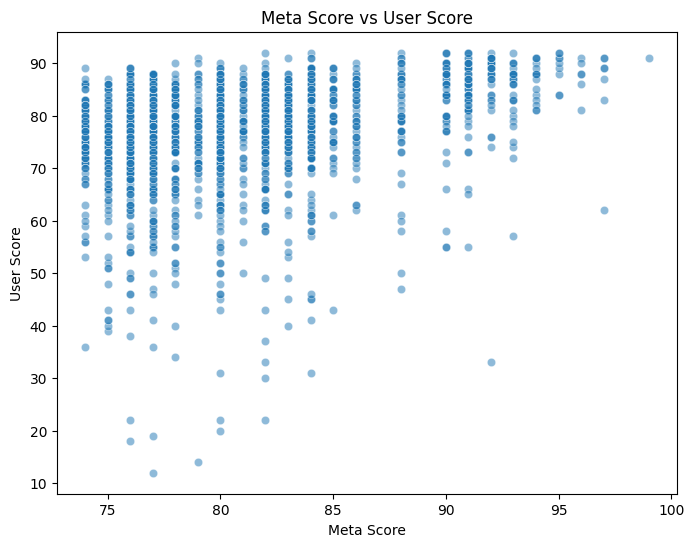

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='meta_score', y='user_score', data=data_games, alpha=0.5)
plt.title('Meta Score vs User Score')
plt.xlabel('Meta Score')
plt.ylabel('User Score')
plt.show()
plt.savefig('score_correlation.png')
plt.close()

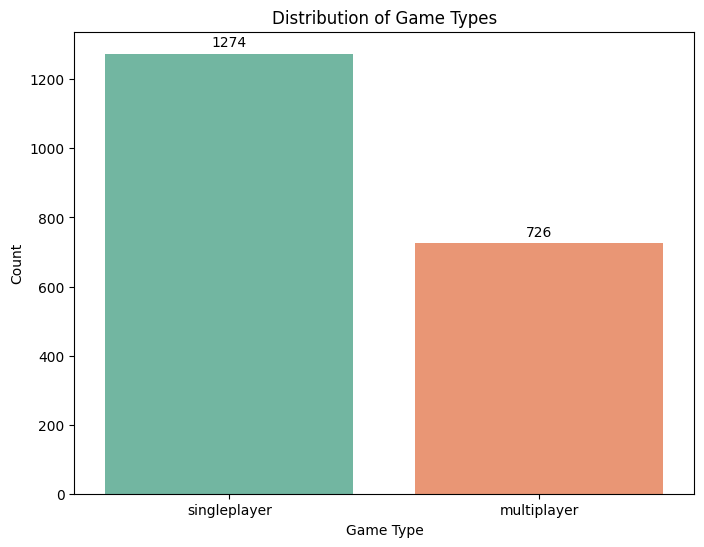

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='type', data=data_games, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=10, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Game Types')
plt.xlabel('Game Type')
plt.ylabel('Count')
plt.savefig('game_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()

# Part 3: Preprocessing Data

In [17]:
data_games['description'] = data_games['description'].str.lower().str.replace('[^\w\s]', '', regex=True)
data_games['genre'] = data_games['genre'].str.strip("[]").str.replace("'", "").str.replace(", ", " ")
data_games['platform'] = data_games['platform'].str.strip("[]").str.replace("'", "").str.replace(", ", " ")

In [18]:
tfidf_desc = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix_desc = tfidf_desc.fit_transform(data_games['description'])

In [19]:
tfidf_genre = TfidfVectorizer()
tfidf_matrix_genre = tfidf_genre.fit_transform(data_games['genre'])

In [20]:
tfidf_platform = TfidfVectorizer()
tfidf_matrix_platform = tfidf_platform.fit_transform(data_games['platform'])

In [21]:
scaler = StandardScaler()
scores = scaler.fit_transform(data_games[['meta_score', 'user_score']])

In [22]:
from scipy.sparse import csr_matrix
scores_sparse = csr_matrix(scores)

In [23]:
combined_features = hstack([tfidf_matrix_desc, tfidf_matrix_genre, tfidf_matrix_platform, scores_sparse]).tocsr()

# Part 4: Modeling

In [24]:
nn_model = NearestNeighbors(metric='euclidean', algorithm='brute')

In [25]:
nn_model.fit(combined_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

# Part 5: Recommendation Function

In [26]:
def recommend_games(game_title, num_recommendations=5):
    try:
        game_index = data_games[data_games['game_name'] == game_title].index[0]

        game_features = combined_features[game_index:game_index+1]

        distances, indices = nn_model.kneighbors(game_features, n_neighbors=num_recommendations + 1)

        recommendations = []
        for i in range(1, len(distances[0])):
            rec_index = indices[0][i]
            rec_title = data_games['game_name'].iloc[rec_index]
            rec_genre = data_games['genre'].iloc[rec_index] if 'genre' in data_games.columns else 'Unknown'
            rec_rating = data_games['rating'].iloc[rec_index] if 'rating' in data_games.columns else 'Unknown'
            rec_distance = distances[0][i]
            recommendations.append((rec_title, rec_genre, rec_rating, rec_distance))

        return recommendations
    except IndexError:
        print(f"Game '{game_title}' not found in the dataset.")
        return []


# Part 6: Evaluation and Visualization

In [27]:
sample_games = [
    "The Legend of Zelda: Ocarina of Time",
    "Super Mario Galaxy",
    "Halo: Combat Evolved",
    "Persona 5 Royal"
]

In [28]:
all_distances = []
recommendation_rows = []

for game in sample_games:
    recommendations = recommend_games(game, num_recommendations=5)
    if recommendations:
        for rec_title, rec_genre, rec_rating, rec_distance in recommendations:
            all_distances.append(rec_distance) 
            recommendation_rows.append({
                'Base Game': game,
                'Recommended Game': rec_title,
                'Genre': rec_genre,
                'Rating': rec_rating,
                'Distance': rec_distance
            })

recommendation_df = pd.DataFrame(recommendation_rows)

print("\nDataFrame of Recommendations:")
recommendation_df


DataFrame of Recommendations:


,Base Game,Recommended Game,Genre,Rating,Distance
0,The Legend of Zelda: Ocarina of Time,The Legend of Zelda: Majora's Mask,Action Adventure Fantasy,E,1.387547
1,The Legend of Zelda: Ocarina of Time,The Legend of Zelda: The Wind Waker,Action Adventure Fantasy,E,1.917349
2,The Legend of Zelda: Ocarina of Time,The Legend of Zelda: A Link to the Past,Action Adventure Fantasy,E,1.974262
3,The Legend of Zelda: Ocarina of Time,The Legend of Zelda Collector's Edition,Action Adventure Fantasy,E,2.124713
4,The Legend of Zelda: Ocarina of Time,Super Mario 64,Action Platformer 3D,E,2.148607
5,Super Mario Galaxy,Super Mario Galaxy 2,Action Platformer 3D,E,1.122512
6,Super Mario Galaxy,Super Mario 3D World,Platformer 3D Action,E,1.368668
7,Super Mario Galaxy,Super Mario Odyssey,Action Platformer 3D,E10+,1.837854
8,Super Mario Galaxy,Super Smash Bros. Brawl,Action Fighting 3D 2D,T,1.848176
9,Super Mario Galaxy,Super Smash Bros. for Wii U,Action Fighting 3D 2D,E10+,1.908732


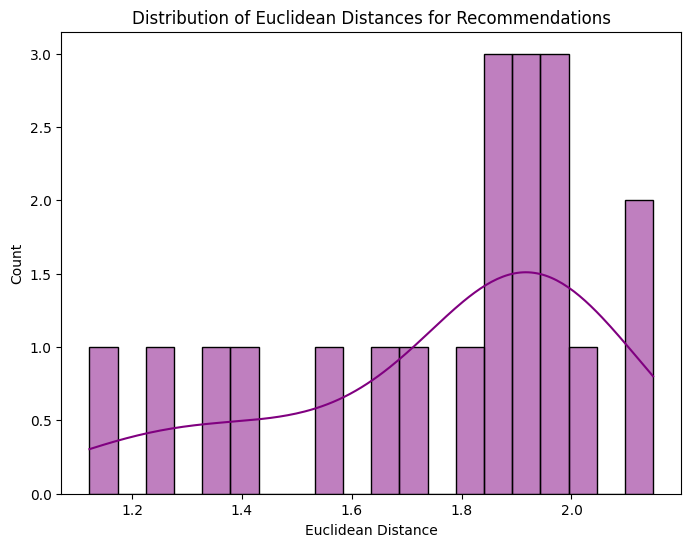

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(all_distances, bins=20, kde=True, color='purple')
plt.title('Distribution of Euclidean Distances for Recommendations')
plt.xlabel('Euclidean Distance')
plt.ylabel('Count')
plt.show()
plt.savefig('recommendation_distances.png')
plt.close()

In [32]:
def intra_list_similarity(recommendations):
    distances = [dist for *_, dist in recommendations]
    return np.mean(distances) if distances else 0

In [33]:
print("\nIntra-List Similarity (Average Euclidean Distance):")
for game in sample_games:
    recommendations = recommend_games(game, num_recommendations=5)
    avg_distance = intra_list_similarity(recommendations)
    print(f"{game}: {avg_distance:.2f}")


Intra-List Similarity (Average Euclidean Distance):
The Legend of Zelda: Ocarina of Time: 1.91
Super Mario Galaxy: 1.62
Halo: Combat Evolved: 1.89
Persona 5 Royal: 1.67
